In [1]:
# clone github with persistence-based clustering code
! git clone https://github.com/LuisScoccola/gamma-linkage.git

Cloning into 'gamma-linkage'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 58 (delta 21), reused 52 (delta 15), pack-reused 0
Unpacking objects: 100% (58/58), done.


In [2]:
# necessary imports
import sys
sys.path.append("gamma-linkage")
from linkage.linkage import *
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from urllib.request import urlopen
from io import BytesIO
sys.setrecursionlimit(3000)

In [3]:
# define functions we will need

def PDdensityFilteredRipsGraph(data, kernel_bandwidth, rips_scale, y_max = None) :
  # outputs persistence diagram of rips graph filtered by KDE
  x = MPSpace(data)
  x.fit(kernel='epanechnikov')
  gamma = Gamma_curve.constant_s_t_k_indexed(kernel_bandwidth, rips_scale)
  hc = x.gamma_linkage(gamma)
  pd = hc.PD()[0]
  pd = np.array(list(map(lambda t : [t[0],np.abs(t[1]-t[0])], pd )))

  plt.figure(figsize=(3,3))
  if y_max is not None :
    plt.ylim([0,y_max])
  plt.xlabel("Birth")
  plt.ylabel("Lifetime")
  plt.locator_params(axis="y", nbins=20)
  plt.scatter(pd[:,0],pd[:,1], s = 10)
  plt.grid(axis='y')
  plt.show()

def clusteringDensityFilteredRipsGraph(data, kernel_bandwidth, rips_scale, persistence_threshold) :
  # outputs clustering of rips graph filtered by KDE, with a certain persistence threshold
  x = MPSpace(data)
  x.fit(kernel='epanechnikov')
  gamma = Gamma_curve.constant_s_t_k_indexed(kernel_bandwidth, rips_scale)
  hc = x.gamma_linkage(gamma)
  return hc.persistence_based_flattening(threshold=persistence_threshold)[1]

def plotDataset(data,clustering=None):
  # plots a dataset and optionally colors by clustering
  _ = plt.figure()
  fig1, ax1 = plt.subplots() ; _ = fig1.set_figheight(3) ; _ = fig1.set_figwidth(4)
  _ = plt.locator_params(axis="x", nbins=10)
  _ = plt.locator_params(axis="y", nbins=10)
  if clustering is not None:
    _ = plt.scatter(data.T[0], data.T[1], s=5, alpha = 0.3, c = -clustering, cmap="Accent")
  else :
    _ = plt.scatter(data.T[0], data.T[1], s=5, alpha = 0.3, cmap="Accent")
  _ = plt.show()

# Dataset 1


<Figure size 432x288 with 0 Axes>

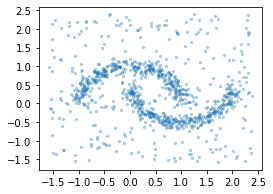

In [4]:
# generate first dataset

n_true_points = int(1000 * 0.7) ; data1, _ = datasets.make_moons(n_samples=n_true_points, noise=0.1, random_state=0)
np.random.seed(0) ; n_noise = 1000 - n_true_points ; noise = (np.random.random_sample((n_noise,2)) - 0.4) * 4 ; data1 = np.vstack((data1,noise))

plotDataset(data1)


Find values for [KERNEL_BANDWIDTH] and [RIPS_SCALE] such that the persistence diagram below seems adequate.

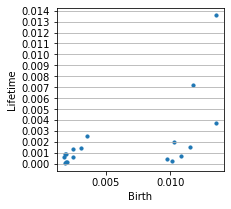

In [5]:
KERNEL_BANDWIDTH = 0.1
RIPS_SCALE = 0.5

PDdensityFilteredRipsGraph(data1, KERNEL_BANDWIDTH,RIPS_SCALE)

Find a value for [PERSISTENCE_THRESHOLD] looking at the persistence diagram above and make sure it produces a reasonable clustering of the data.

<Figure size 432x288 with 0 Axes>

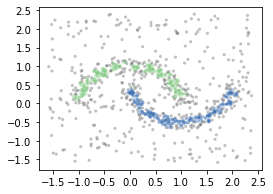

In [6]:
PERSISTENCE_THRESHOLD = 0.004
c = clusteringDensityFilteredRipsGraph(data1, KERNEL_BANDWIDTH,RIPS_SCALE,PERSISTENCE_THRESHOLD)

plotDataset(data1,clustering=c)

# Dataset 2


<Figure size 432x288 with 0 Axes>

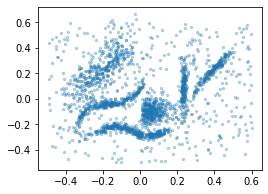

In [7]:
# download second dataset to variable

url = "https://github.com/scikit-learn-contrib/hdbscan/blob/4052692af994610adc9f72486a47c905dd527c94/notebooks/clusterable_data.npy?raw=true"
f = urlopen(url) ; rf = f.read() ; data2 = np.load(BytesIO(rf))

plotDataset(data2)


Find values for [KERNEL_BANDWIDTH] and [RIPS_SCALE] such that the persistence diagram below seems adequate.

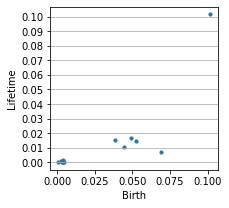

In [8]:
KERNEL_BANDWIDTH = 0.1
RIPS_SCALE = 0.08

PDdensityFilteredRipsGraph(data2, KERNEL_BANDWIDTH,RIPS_SCALE)

Find a value for [PERSISTENCE_THRESHOLD] looking at the persistence diagram above and make sure it produces a reasonable clustering of the data.

<Figure size 432x288 with 0 Axes>

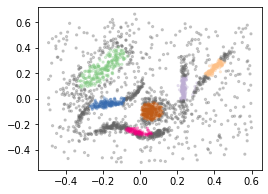

In [9]:
PERSISTENCE_THRESHOLD = 0.005
c = clusteringDensityFilteredRipsGraph(data2, KERNEL_BANDWIDTH,RIPS_SCALE,PERSISTENCE_THRESHOLD)

plotDataset(data2,c)

# Dataset 3


<Figure size 432x288 with 0 Axes>

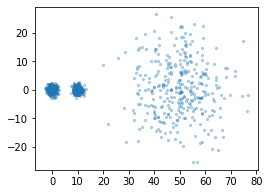

In [10]:
# generate third dataset

data3, _ = datasets.make_blobs(n_samples=1000, centers=[[0,0],[10,0],[50,0]], n_features=2, random_state=0, cluster_std=[1,1,10])
plotDataset(data3)

Try to find values for [KERNEL_BANDWIDTH] and [RIPS_SCALE] such that the persistence diagram below seems adequate.

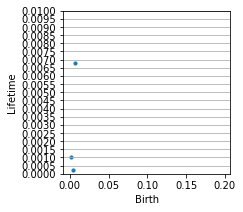

In [ ]:
KERNEL_BANDWIDTH = 2
RIPS_SCALE = 10

PDdensityFilteredRipsGraph(data3, KERNEL_BANDWIDTH,RIPS_SCALE, y_max=0.01)

Try to find a value for [PERSISTENCE_THRESHOLD] looking at the persistence diagram above and make sure it produces a reasonable clustering of the data.

<Figure size 432x288 with 0 Axes>

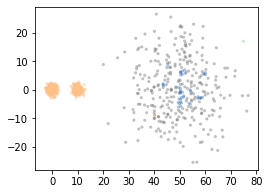

In [ ]:
PERSISTENCE_THRESHOLD = 0.0001
c = clusteringDensityFilteredRipsGraph(data3, KERNEL_BANDWIDTH,RIPS_SCALE,PERSISTENCE_THRESHOLD)

plotDataset(data3,c)